# Test player-wise Metropolis sampling.

## Setup

In [1]:
import os
import sys

os.chdir("..")

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import load, munge
import src.models.gp

In [145]:
import importlib
importlib.reload(src.load)
importlib.reload(src.munge)
importlib.reload(src.models.gp)

<module 'src.models.gp' from '/Users/yl3/github/dota2/src/models/gp.py'>

## Load data.

In [4]:
matches = load.all_matches_df()

In [5]:
matches_ti9 = matches.loc[matches.league_name == "The International 2019"]
matches_ti9.shape

(268, 15)

In [146]:
players_mat_ti9 = munge.make_match_players_matrix(
    matches_ti9.radiant_players, matches_ti9.dire_players)
players_mat_ti9.shape

(268, 240)

## Get a list of player IDs.

In [147]:
players = munge.player_id_to_player_name(
    pd.concat([matches_ti9.radiant_players, matches_ti9.dire_players]),
    pd.concat([matches_ti9.radiant_nicknames, matches_ti9.dire_nicknames]),
    pd.concat([matches_ti9.radiant_valveId, matches_ti9.dire_valveId]),
    pd.concat([matches_ti9.radiant_name, matches_ti9.dire_name]),)

In [93]:
players.loc[players_mat_ti9.columns[:5]]

,name,team,team_id
3916428,EGM,Bald,Bald
3940262,March,Team Jinesbrus,Team Jinesbrus
4281729,syndereN,Anti-MagE-,Anti-MagE-
6922000,pieliedie,Forward Gaming,Forward Gaming
10366616,Sneyking,Forward Gaming,Forward Gaming


## Run model manually.

In [100]:
twenty_years_in_ms = 20 * 365 * 24 * 60 * 60 * 1000

In [122]:
import importlib
importlib.reload(src.load)
importlib.reload(src.munge)
importlib.reload(src.models.gp)

<module 'src.models.gp' from '/Users/yl3/github/dota2/src/models/gp.py'>

In [124]:
gp = src.models.gp.SkillsGP(players_mat_ti9.values,
                            matches_ti9.startTimestamp,
                            matches_ti9.radiantVictory,
                            players_mat_ti9.columns.values,
                            "exponential", {"scale": twenty_years_in_ms},
                            propose_sd=0.3, save_every_n_iter=10)

In [125]:
gp.iterate_once_player_wise()

In [126]:
gp.samples

[(0, array([0., 0., 0., ..., 0., 0., 0.]), 10020.281916492957)]

In [127]:
for i in range(5):
    display(src.models.gp._dropna(gp.skills_vec_to_mat(gp._cur_skills)[:, i]))

array([-0.34522683, -0.34541071, -0.34383071, -0.34919866, -0.34733435,
       -0.3467186 , -0.34718391])

array([-0.30232386, -0.30400264, -0.30366677, -0.30232215, -0.30246144,
       -0.30410912, -0.30405009, -0.30365653, -0.29696096, -0.29684364,
       -0.29689095, -0.29746926, -0.296117  , -0.2978064 , -0.29705385,
       -0.30165318, -0.30075874, -0.29964608, -0.29756251])

array([-0.12044756, -0.12215347, -0.12278198, -0.1241032 , -0.12571159,
       -0.12539879, -0.12491165, -0.12513817, -0.12665395])

array([-0.14992066, -0.14926153, -0.14918832, -0.14752363, -0.14102453,
       -0.14176067, -0.1437197 , -0.14490072, -0.14149768, -0.13999682,
       -0.14186314, -0.14290263, -0.1429994 , -0.14413006, -0.14275355])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### 100 player-wise iterations.

In [128]:
gp.iterate(100, "playerwise")

100% (100 of 100) |######################| Elapsed Time: 0:00:16 Time:  0:00:16


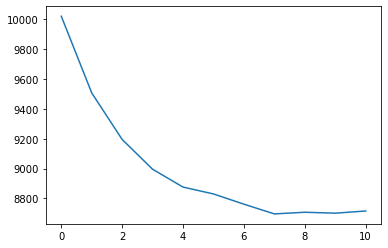

In [129]:
plt.plot([x[2] for x in gp.samples])

In [130]:
[[x[0], x[2], x[3], x[4]] for x in gp.samples[1:]]

[[10, 9506.867638374992, 9682.800486039396, -175.93284766440487],
 [20, 9195.082051892883, 9366.509062710986, -171.42701081810299],
 [30, 8995.851009327875, 9162.05508828873, -166.20407896085527],
 [40, 8876.35433798713, 9044.512753869665, -168.15841588253488],
 [50, 8830.372692444596, 9000.40258373665, -170.02989129205287],
 [60, 8761.961361908894, 8935.732910746225, -173.77154883733124],
 [70, 8696.700951577262, 8865.279994821361, -168.57904324409935],
 [80, 8707.85359572432, 8876.643439419415, -168.78984369509448],
 [90, 8701.67113034322, 8867.678134225596, -166.00700388237618],
 [100, 8716.283738854992, 8877.764781962911, -161.48104310791786]]

### 1,000 iterations.

In [131]:
gp.iterate(1000, "playerwise")

100% (1000 of 1000) |####################| Elapsed Time: 0:02:48 Time:  0:02:48


In [132]:
[[x[0], x[2], x[3], x[4]] for x in gp.samples[-10:]]

[[1010, 8650.59885845824, 8819.023565366979, -168.42470690873967],
 [1020, 8693.22030574966, 8861.402313576806, -168.18200782714564],
 [1030, 8665.290121430535, 8834.515847314315, -169.22572588378003],
 [1040, 8630.925062545086, 8798.561021125319, -167.63595858023322],
 [1050, 8640.686388239108, 8809.334839543322, -168.64845130421327],
 [1060, 8659.957061697944, 8829.864600400686, -169.90753870274207],
 [1070, 8661.405758031924, 8828.887963836816, -167.48220580489294],
 [1080, 8644.769371996563, 8812.967798628226, -168.19842663166307],
 [1090, 8625.009995688972, 8795.232378956196, -170.22238326722493],
 [1100, 8608.445613436454, 8775.008493682097, -166.5628802456436]]

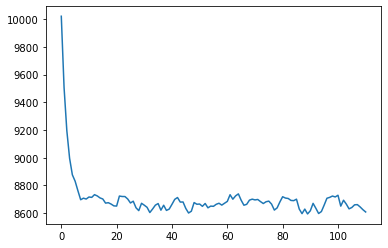

In [133]:
plt.plot([x[2] for x in gp.samples])

## What are skill levels after fitting?

In [188]:
samples = [gp.skills_vec_to_mat(x[1]) for x in gp.samples[20:]]

In [193]:
skills = pd.DataFrame(
    np.mean(samples, axis=0),
    columns=pd.MultiIndex.from_arrays(
        [players.loc[players_mat_ti9.columns, "team"],
        players.loc[players_mat_ti9.columns, "name"]])
)

In [194]:
skills

team Bald Team Jinesbrus Anti-MagE- Forward Gaming           Team Spirit  \
name  EGM          March   syndereN      pieliedie  Sneyking     VANSKOR   
0     NaN            NaN        NaN       0.159052  0.885483         NaN   
1     NaN            NaN        NaN       0.157186  0.885290         NaN   
2     NaN            NaN        NaN       0.157011  0.886079         NaN   
3     NaN            NaN        NaN       0.157654  0.887376         NaN   
4     NaN            NaN        NaN            NaN       NaN         NaN   
5     NaN            NaN        NaN            NaN       NaN         NaN   
6     NaN            NaN        NaN            NaN       NaN         NaN   
7     NaN            NaN        NaN            NaN       NaN         NaN   
8     NaN            NaN        NaN            NaN       NaN         NaN   
9     NaN            NaN        NaN            NaN       NaN         NaN   
10    NaN            NaN        NaN            NaN       NaN         NaN   
11    NaN            NaN        NaN            NaN       NaN         NaN   
12    NaN            NaN        NaN            NaN       NaN         NaN   
13    NaN            NaN        NaN            NaN       NaN         NaN   
14    NaN            NaN        NaN            NaN       NaN         NaN   
15    NaN            NaN        NaN            NaN       NaN         NaN   
16    NaN            NaN        NaN            NaN       NaN         NaN   
17    NaN            NaN        NaN            NaN       NaN         NaN   
18    NaN            NaN        NaN            NaN       NaN         NaN   
19    NaN            NaN        NaN            NaN       NaN         NaN   
20    NaN            NaN        NaN            NaN       NaN         NaN   
21    NaN            NaN        NaN            NaN       NaN         NaN   
22    NaN            NaN        NaN       0.162146  0.889617         NaN   
23    NaN            NaN        NaN       0.164275  0.889832         NaN   
24    NaN            NaN        NaN            NaN       NaN         NaN   
25    NaN            NaN        NaN       0.165458  0.890283         NaN   
26    NaN            NaN        NaN            NaN       NaN         NaN   
27    NaN            NaN        NaN       0.165719  0.890563         NaN   
28    NaN            NaN        NaN            NaN       NaN         NaN   
29    NaN            NaN        NaN            NaN       NaN         NaN   
..    ...            ...        ...            ...       ...         ...   
238   NaN            NaN        NaN            NaN       NaN         NaN   
239   NaN            NaN        NaN            NaN       NaN   -0.233053   
240   NaN            NaN        NaN            NaN       NaN         NaN   
241   NaN            NaN        NaN            NaN       NaN         NaN   
242   NaN            NaN        NaN            NaN       NaN         NaN   
243   NaN            NaN        NaN            NaN       NaN   -0.232954   
244   NaN            NaN        NaN            NaN       NaN         NaN   
245   NaN            NaN        NaN            NaN       NaN         NaN   
246   NaN            NaN        NaN            NaN       NaN         NaN   
247   NaN            NaN        NaN            NaN       NaN         NaN   
248   NaN            NaN        NaN            NaN       NaN         NaN   
249   NaN            NaN        NaN            NaN       NaN         NaN   
250   NaN      -0.218409        NaN            NaN       NaN         NaN   
251   NaN            NaN        NaN            NaN       NaN         NaN   
252   NaN            NaN        NaN            NaN       NaN   -0.231041   
253   NaN            NaN        NaN            NaN       NaN         NaN   
254   NaN            NaN        NaN            NaN       NaN         NaN   
255   NaN            NaN        NaN            NaN       NaN         NaN   
256   NaN      -0.218881        NaN            NaN       NaN         NaN   
257   NaN            NaN        NaN            N

In [195]:
skills.mean().sort_values()

team                  name            
Team Ham              HeStEJoE-RoTTeN    -0.999801
Old Suck Gaming       Empyrean           -0.959999
Gorillaz-Pride        DarkMago♥          -0.952510
RESURGENCE            ponlo              -0.847745
Furia                 Hyko               -0.733487
Nemiga Gaming         Astral             -0.726022
Bald                  Stormstormer       -0.681982
Team EVOS             Facehugger         -0.643154
FlyToMoon             Iceberg            -0.633324
Team Spirit           633                -0.586327
                      G                  -0.574432
BOOM ID               Fibroez            -0.566113
Furia                 mini-`             -0.562294
Team EVOS             Vlaicu             -0.561711
Bald                  EGM                -0.561567
Old Suck Gaming       chives             -0.560068
Unknown Radiant Team  symetricaL         -0.557292
SG e-sports           4naloG             -0.544669
Bald                  Eixn               -0

In [196]:
skills.mean().sort_values().reset_index().groupby("team").sum().sort_values(0, ascending=False)

,0
team,
Infamous Gaming,4.463856
Vega Squadron,3.053772
Chaos Esports Club,2.711474
Forward Gaming,2.671923
Natus Vincere,1.960139
paiN Gaming,1.791270
CDEC,1.695414
Mineski,1.324355
Royal Never Give Up,1.266677


In [187]:
src.models.gp.win_prob(1.255688 - 0.694887)

0.5280106918219049

### Visualise variance.

In [215]:
idx1 = skills.columns.get_level_values("team") == "Infamous Gaming"

In [221]:
idx2 = skills.columns.get_level_values("team") == "paiN Gaming"

(array([ 6.,  7.,  7., 11.,  6.,  8., 10.,  7.,  4.,  5.]),
 array([1.74693021, 2.34400657, 2.94108294, 3.53815931, 4.13523567,
        4.73231204, 5.3293884 , 5.92646477, 6.52354113, 7.1206175 ,
        7.71769387]),
 <a list of 10 Patch objects>)

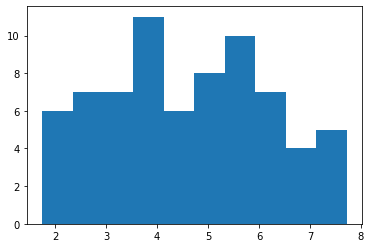

In [234]:
plt.hist([np.nanmean(np.sum(x[:, idx1], axis=1)) for x in samples[20:]])

(array([ 9., 10., 13., 14.,  9.,  7.,  3.,  4.,  1.,  1.]),
 array([-0.61387005,  0.15822746,  0.93032496,  1.70242247,  2.47451997,
         3.24661748,  4.01871498,  4.79081249,  5.56290999,  6.3350075 ,
         7.107105  ]),
 <a list of 10 Patch objects>)

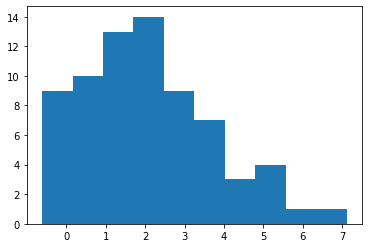

In [235]:
plt.hist([np.nanmean(np.sum(x[:, idx2], axis=1)) for x in samples[20:]])

(array([ 2.,  5.,  5., 13.,  9., 19.,  8.,  5.,  2.,  3.]),
 array([-2.32298006, -1.34293873, -0.3628974 ,  0.61714394,  1.59718527,
         2.5772266 ,  3.55726793,  4.53730926,  5.51735059,  6.49739193,
         7.47743326]),
 <a list of 10 Patch objects>)

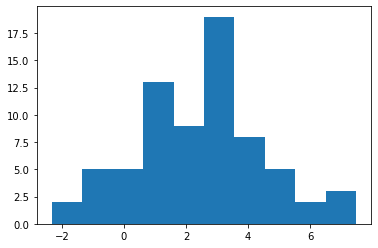

In [236]:
plt.hist([np.nanmean(np.sum(x[:, idx1], axis=1) - np.sum(x[:, idx2], axis=1)) for x in samples[20:]])